# **Project 3**, APS1070 Fall 2022
#### **PCA [14 marks]**
**Deadline: Nov 17, 21:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   **Name**: Tongfei Li
*   **Student number**: 1004759460



### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



In this project we work on a Covid-19 dataset that reports the number of confirmed cases per day and Fashion MNIST.

# Part 1: Getting started [2 Marks]

In [1]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/APS_COVID_Jan22.csv',
    index_col=0,
    thousands=','
)

In [29]:
cases_raw

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649
Albania,0,0,0,0,0,0,0,0,0,0,...,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070
Algeria,0,0,0,0,0,0,0,0,0,0,...,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670
Andorra,0,0,0,0,0,0,0,0,0,0,...,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025
Angola,0,0,0,0,0,0,0,0,0,0,...,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,1991484,2007862,2023546,2023546,2062128,2078087,2094802,2110737,2126444,2141422
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474234,474234,474234,476328,477151,478084,479343,480583,480583,480583
Yemen,0,0,0,0,0,0,0,0,0,0,...,10233,10233,10252,10352,10408,10449,10507,10585,10585,10585
Zambia,0,0,0,0,0,0,0,0,0,0,...,293695,295028,296132,296817,298032,299172,299971,300587,301203,301630


In [7]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
from numpy import linalg as LA
import  seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

1. Write a function to do the following: **[0.5]**
    * Takes the dataframe, and your country list as inputs (US, China, Canada, ...)
    * Plots time-series for the input list (it is best to plot each country in a separate graph (subplot), so you can easily compare them.)
    
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.5]**
3. Run the function in `step 1` on the standardized dataset for the `US`, `China`, and `Canada`.   **[0.5]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate? **[0.5]**

Part1.1

In [223]:
### YOUR CODE HERE ###

def plot_ts(country,df):
    if (len(country)==1):
        plt.subplot(4,1,1)
        df.loc[country[0],:].plot(figsize=(10,20))
        plt.xlabel('Date')
        plt.ylabel('Cases')
        plt.title(str(country)+'Time-Series')
    else:
        n=1
        for i in country:
            #set 2 subplot in 1 row
            plt.subplot(round(len(country)/2)+1,2,n)
            df.loc[i,:].plot(figsize=(20,15))
            plt.xlabel('Date')
            plt.ylabel('Cases')
            plt.title(i+'Time-Series')
            n+=1
        


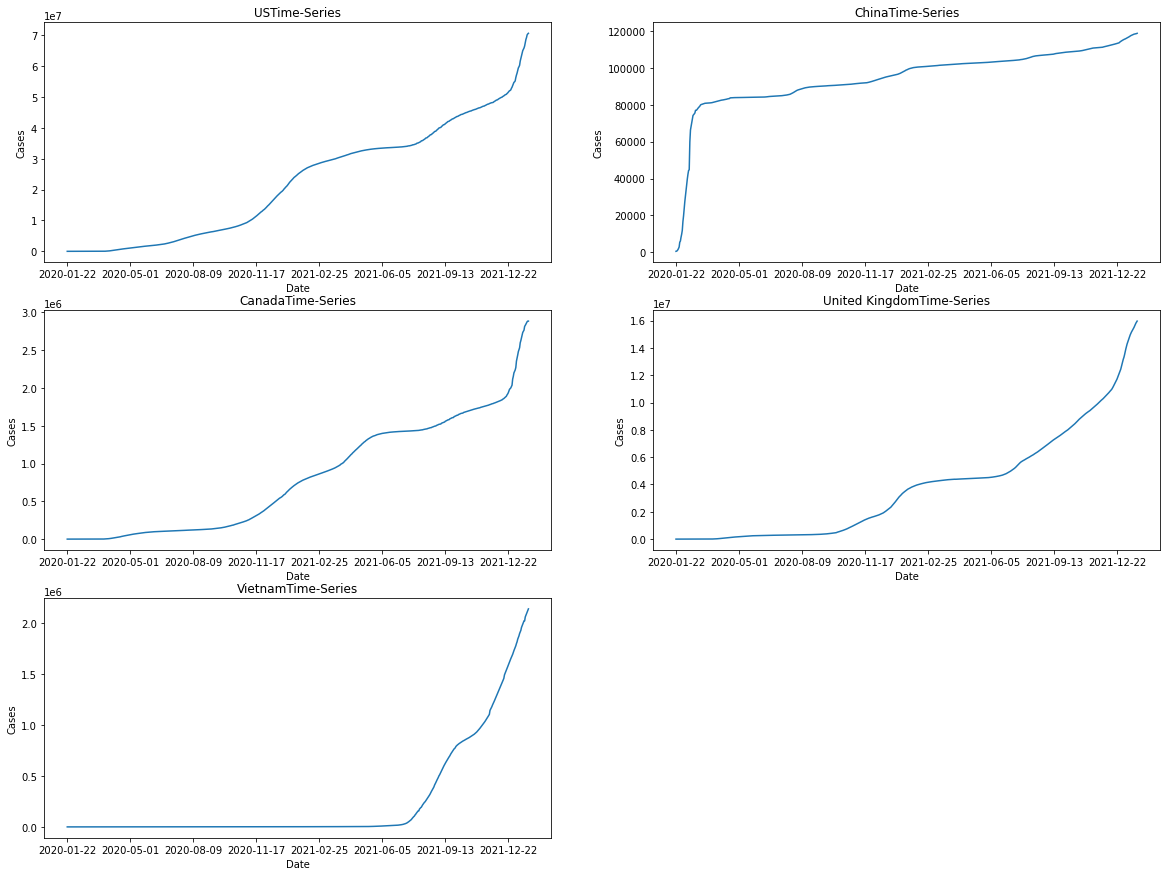

In [193]:
## try plot_ts function ##
# set input list, we want to plot US, China, Canada, UK, Vietnam
c=['US','China','Canada','United Kingdom','Vietnam']
plot_ts(c,cases_raw)

Part1.2

In [28]:
scaler = StandardScaler()
x_std = scaler.fit_transform(cases_raw)
case_std = pd.DataFrame(x_std,columns=cases_raw.columns,index=cases_raw.index)
case_std

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23
Afghanistan,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.254553,-0.254982,-0.255055,-0.255169,-0.254794,-0.255016,-0.255453,-0.255624,-0.256252,-0.256926
Albania,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.242599,-0.242745,-0.242623,-0.242692,-0.242044,-0.242016,-0.242233,-0.242166,-0.242527,-0.243002
Algeria,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.243246,-0.243669,-0.243729,-0.243844,-0.243513,-0.243674,-0.244009,-0.244051,-0.244403,-0.244797
Andorra,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.276497,-0.276791,-0.276722,-0.276669,-0.276027,-0.275992,-0.275892,-0.275730,-0.276244,-0.276866
Angola,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.265689,-0.266015,-0.265991,-0.265983,-0.265436,-0.265455,-0.265758,-0.265772,-0.266309,-0.266857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,-0.072791,-0.029292,-0.042737,-0.053076,-0.059572,-0.063104,-0.067417,-0.067945,-0.068994,-0.069665,...,0.057832,0.058149,0.058581,0.055760,0.058247,0.056585,0.055790,0.054531,0.054536,0.055156
West Bank and Gaza,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.200764,-0.201547,-0.201990,-0.202228,-0.202459,-0.203216,-0.203988,-0.204589,-0.205525,-0.206386
Yemen,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.279847,-0.280119,-0.280025,-0.279927,-0.279231,-0.279148,-0.279380,-0.279297,-0.279790,-0.280400
Zambia,-0.072791,-0.072953,-0.073252,-0.073043,-0.073102,-0.072862,-0.072513,-0.072557,-0.072442,-0.072529,...,-0.231534,-0.231893,-0.231944,-0.232160,-0.231921,-0.232267,-0.232832,-0.233200,-0.233869,-0.234567


Part1.3

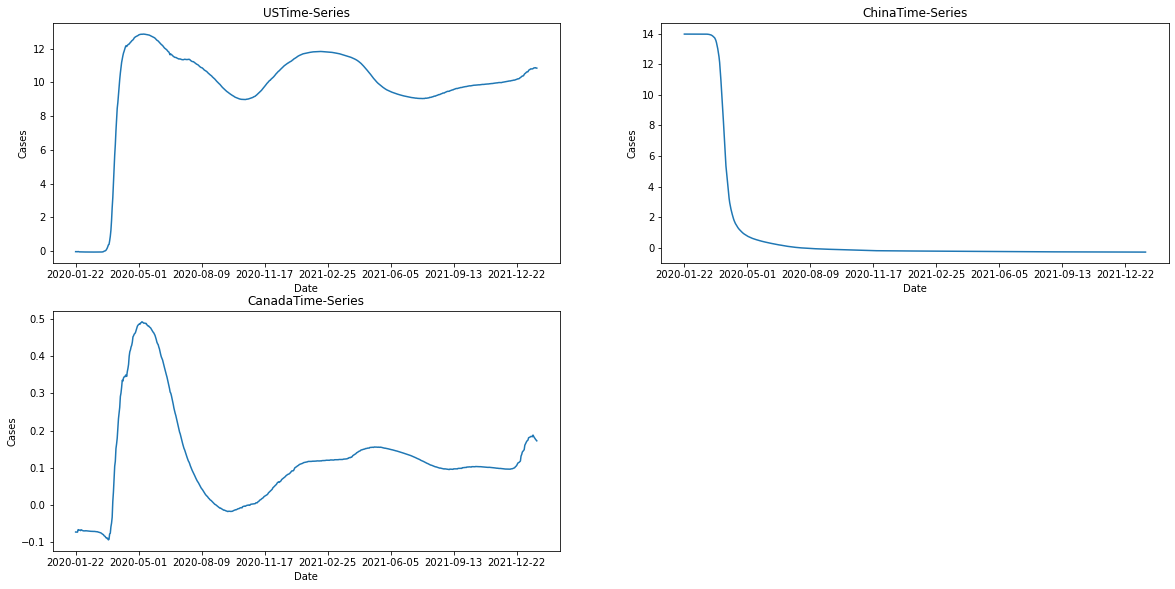

In [34]:
# apply 'US','China','Canada' to plot standardized data
c=['US','China','Canada']
plot_ts(c,case_std)

In [40]:
case_std.iloc[:,30].mean()

1.0535789927565262e-16

Part1.4. Discuss the trends in the standardized time-series for the US, Canada, and China. What does it mean if the curve goes up or down (are the number of covid cases negative?) What does the sign of values indicate?

Standardization makes cases of each day(columns) of mean 0, and standard deviation of 1. If the curve goes up, it means that the total number of cases in the country grows faster than the average, if the curve goes down, the total cases in the country grows slower than world average.

If a country has a positive standardized case number of that day, it means that the country has a higher than average total cases until that day, vice versa. If the absolute value of standardized case number is higher, it means that the total cases of the country is furtherer away from avearage.

For US, we can see that the number of cases grow dramatically in around March 2020, after that, US has a very large number of covid cases compared to world average.

For China, we can see that the covid cases is very high compared to world average at the biginning, which indicates it can be the origin of the virus. Differently, the growing of covid cases in China has been strongly suppressed from Feburary to May in 2020, the number of cases remains around the world average after May2020.

For Canada, the covid cases is lower than average at first, then it grows faster than world average from around March 2020. After May 2020, the cases in Canada shows a decresing speed of grow, and the total cases remains a little bit higher than world average after 2021

# Part 2: Applying PCA [3 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (733, 733).* **[0.5]**
2. Write a function `get_sorted_eigen(df_cov)` that gets the covariance matrix of dataframe `df` (from step 1), and returns sorted eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.5]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`(Bars for each componenet and a line to show cumulative --similar to tutoriual. Limit x-axis if needed to better see the plot). **[0.5]**
4. How many PCs do you need to cover 98% of the dataset's variance? **[0.5]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

Part2.1

In [407]:
case_cov = np.cov(case_std.values.T)
print('dimension of covariance matrix is:',case_cov.shape)
print(case_cov)

dimension of covariance matrix is: (733, 733)
[[ 1.00512821  1.00512126  1.00511414 ... -0.01743542 -0.01747945
  -0.0175254 ]
 [ 1.00512126  1.00512821  1.00512134 ... -0.0176613  -0.01770506
  -0.01775095]
 [ 1.00511414  1.00512134  1.00512821 ... -0.01690253 -0.01694052
  -0.01698123]
 ...
 [-0.01743542 -0.0176613  -0.01690253 ...  1.00512821  1.00511854
   1.00510009]
 [-0.01747945 -0.01770506 -0.01694052 ...  1.00511854  1.00512821
   1.00512153]
 [-0.0175254  -0.01775095 -0.01698123 ...  1.00510009  1.00512153
   1.00512821]]


Part2.2

In [408]:
def get_sorted_eigen(df_cov):
    va, ve = LA.eigh(df_cov)
    # eigenvalues here is ascending, we want decending order
    va = np.flip(va)
    ve = np.flip(ve,1)
    return va,ve

In [409]:
eigenValues, eigenVectors=get_sorted_eigen(case_cov)

In [410]:
# args = (-eigenValues).argsort()
# eigenValues = eigenValues[args]
# eigenVectors = eigenVectors[:, args]

Part2.3

I limited x axis to 5 eigenvalus, since the explained variance after that is less than 0.16, which leads to minor change in cumulative explained variance.

In [411]:
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
cumExpVar

array([ 85.47590445,  94.10558679,  98.08990311,  99.30079148,
        99.65862424,  99.8113032 ,  99.8744641 ,  99.91875382,
        99.94442571,  99.9666193 ,  99.97667849,  99.98351037,
        99.98804715,  99.9917002 ,  99.99399051,  99.99535537,
        99.9964488 ,  99.99718047,  99.99781163,  99.99825964,
        99.99865153,  99.99893343,  99.99917858,  99.99935209,
        99.99946151,  99.99954626,  99.99962391,  99.99968637,
        99.99973659,  99.99977844,  99.99981033,  99.9998396 ,
        99.99986021,  99.99987813,  99.99989412,  99.99990831,
        99.9999198 ,  99.99992963,  99.99993756,  99.99994412,
        99.99995051,  99.99995659,  99.99996145,  99.9999658 ,
        99.99996971,  99.99997289,  99.99997559,  99.9999778 ,
        99.99997996,  99.99998209,  99.99998389,  99.99998555,
        99.99998703,  99.99998821,  99.99998936,  99.99999034,
        99.99999128,  99.99999211,  99.99999275,  99.99999333,
        99.99999386,  99.99999435,  99.9999948 ,  99.99

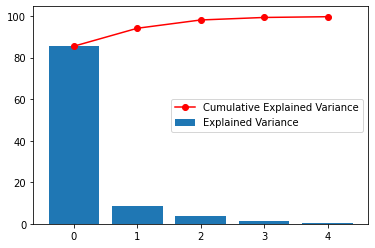

In [412]:
plt.bar(range(5), expVar[:5], label='Explained Variance')
plt.plot(cumExpVar[:5], 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

Part2.4. How many PCs do you need to cover 98% of the dataset's variance?



In [413]:
i=1
for cum in cumExpVar:
    if cum >= 98:
        break
    i+=1

print('To cover 98% of dataset variance, we need',i,'PCs')

To cover 98% of dataset variance, we need 3 PCs


Part2.5 

Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) 

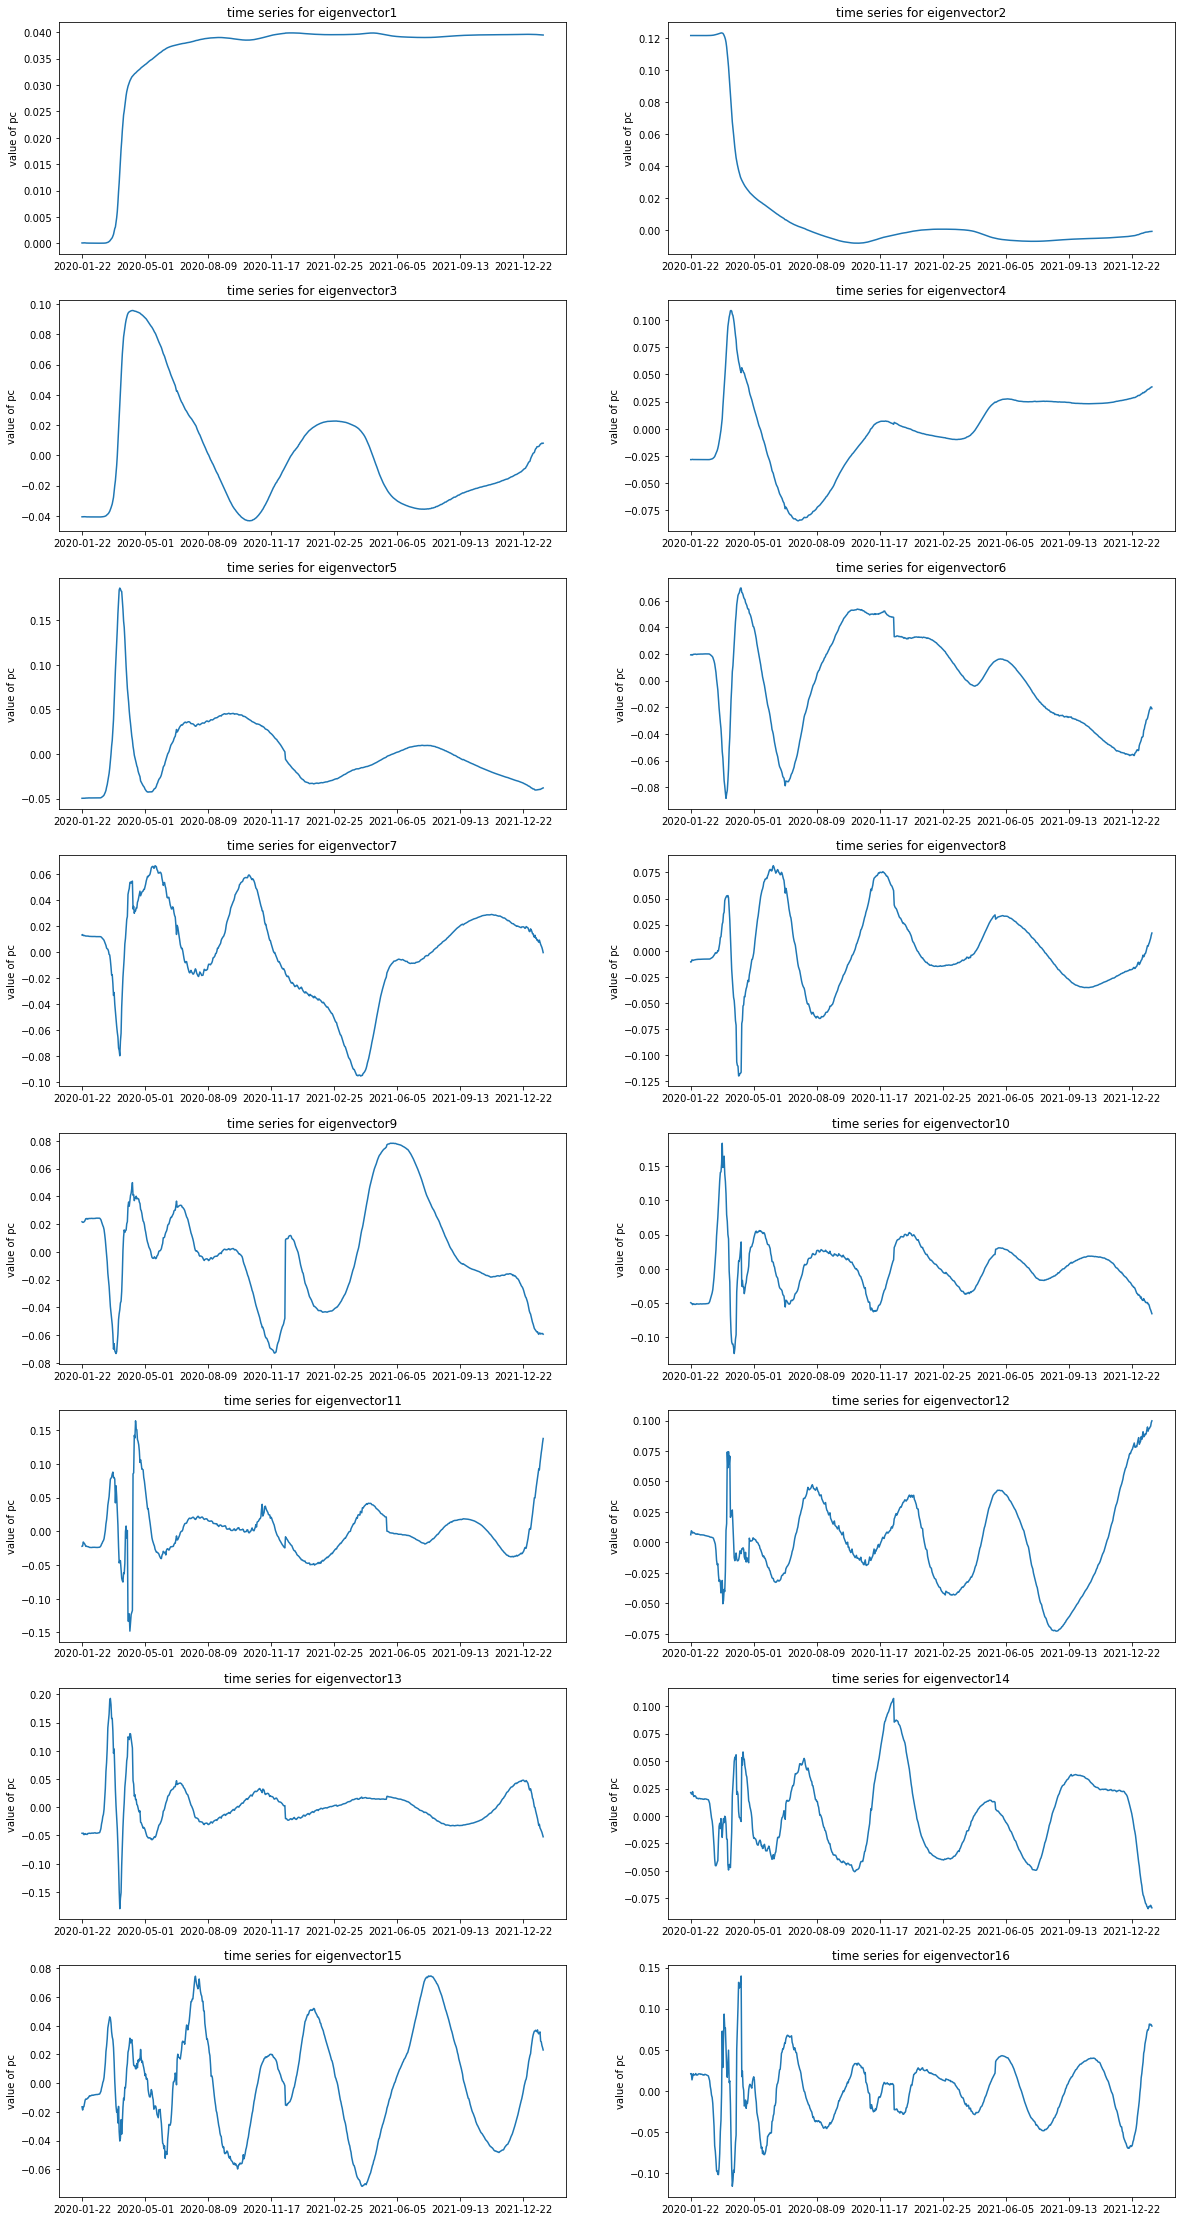

In [414]:
ve_df = pd.DataFrame(eigenVectors[:, :16].T,columns=case_std.columns)
ve_df
for i in range(16):
    #set 2 subplot in 1 row
    plt.subplot(8,2,i+1)
    ve_df.loc[i,:].plot(figsize=(20,40))
#     plt.xlabel('Date')
    plt.ylabel('value of pc')
    plt.title('time series for eigenvector'+str(i+1))


Part2.6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? Compare the first few PCs with the rest of them. Do you see any difference in their trend? 

The first few PCs has more smoothed line during the whole time series, for PC1 and PC2, they are almost strictly increasing or decreasing. Going from PC3 to PC16, they fluctualted more and more, my conjecture is they capture signals from outliers, which may lead to overfitting of the model.

PC1 and PC2 have their value going to opposite side, PC1 is increasing dring time, PC2 is decresing dring time.

# Part 3: Data reconstruction [5 Marks]

Create a function that:

*   Accepts a country and the original dataset as inputs.
*   Calls useful functions that you designed in previous parts to compute eigen vectors and eigen values. 
*   Plots 4 figures:
  1.   The original time-series for the specified country. **[1]**
  2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1]**
       * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
          * Reconstruction with only PC1
          * Reconstruction with both PC1 and PC2
          * Reconstruction with PC1 to PC4 (First 4 PCs)
          * Reconstruction with PC1 to PC8 (First 8 PCs)
          * Reconstruction with PC1 to PC16 (First 16 PCs)

      * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
  3.   The residual error for your best reconstruction with respect to the original time-series. **[1]**
      * Hint: You are plotting the error that we have for reconstructing each day `(df - df_reconstructed)`. On the x-axis, you have dates, and on the y-axis, the residual error. 
  4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). Sweep x-axis from 1 to 100 (this part is independent from part 3.2.) **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[1]**


In [433]:
def plot_country_figures(original_df, country_name):
    scaler = StandardScaler()
    x_std = scaler.fit_transform(original_df)
    case_std = pd.DataFrame(x_std,columns=original_df.columns,index=original_df.index)
    case_cov = np.cov(case_std.values.T)
    eigenValues, eigenVectors=get_sorted_eigen(case_cov)
    ## 1. original time series for the specified country ##
    plot_ts(country_name,original_df)
    
    ## 2. incremental reconstrution of the original (not standardized) time-series for the country ##
    # create reconstructed images
    numEvsSet = [1, 2, 4, 8, 16] # these no. of eigenVectors will be used to reconstruct the image.
    plt.subplot(4,1,2)
    original_df.loc[country_name[0],:].plot(figsize=(10,20),label='origenal')
    for numEvs in numEvsSet:
        P = np.dot(case_std, eigenVectors[:, 0:numEvs])
        R = np.dot(P , eigenVectors[:, 0:numEvs].T)
        r_in = scaler.inverse_transform(R)
        r_df = pd.DataFrame(r_in,index=case_std.index,columns=case_std.columns)
        r_df.loc[country_name[0],:].plot(figsize=(10,20),label='incremental to PC'+str(numEvs))
#         print(r_df)
#         print(r_in)
#         print('next')
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.title(str(country_name[0])+'Time-Series')
    plt.legend()
    
    ## 3.  residual error for best reconstruction with respect to the original time-series ##
    best_re = 3
    P = np.dot(case_std, eigenVectors[:, 0:best_re])
    R = np.dot(P , eigenVectors[:, 0:best_re].T)
    r_in = scaler.inverse_transform(R)
    # residual = actual - predict
    residual_re = original_df.values-r_in
    residual_df = pd.DataFrame(residual_re,index=case_std.index,columns=case_std.columns)
    plt.subplot(4,1,3)
    residual_df.loc[country_name[0],:].plot(figsize=(10,20))
    plt.xlabel('Date')
    plt.ylabel('Residual error')
    plt.title('residual error of '+str(country_name[0])+' reconstruction PC1-PC3')
    
    ## 4. The RMSE of the reconstruction as a function of the number of included components ##
    x_l=[]
    rmse_l=[]
    for i in range(100):
        x = i+1
        x_l.append(x)
        P = np.dot(case_std, eigenVectors[:, 0:x])
        R = np.dot(P , eigenVectors[:, 0:x].T)
        r_in = scaler.inverse_transform(R)
        rmse_l.append(mean_squared_error(original_df.values, r_in, squared = False))
    plt.subplot(4,1,4)  
    plt.plot(x_l,rmse_l)
    plt.xlabel('Included components')
    plt.ylabel('RMSE')
    plt.title('RMSE Plot')

    
    return
### YOUR CODE HERE ###

In step 3, I choose incremental reconstruction to PC3 as best model.

In step 2 plot for US, incremental to PC1 and PC2 shows significant error from 2021-02 to 2021-12, compared to original one. While incremental to PC4, PC8, PC16 looks similar in our plot. Since the last 2 models does not increase much in performance, 4 PCs are already enough for this model. In step 2 plot for China, we can see incremental to PC2 still shows significant error, so I would say we need at least 3 PCs.

In part 2 result, we can know that 3 PCs explains 98% variance of the data. Taking into consideration of smaller model complexity and larger model explained variance, I choose incremental to PC3 here as best model.

Test your function using the US, Canada, and China as inputs.

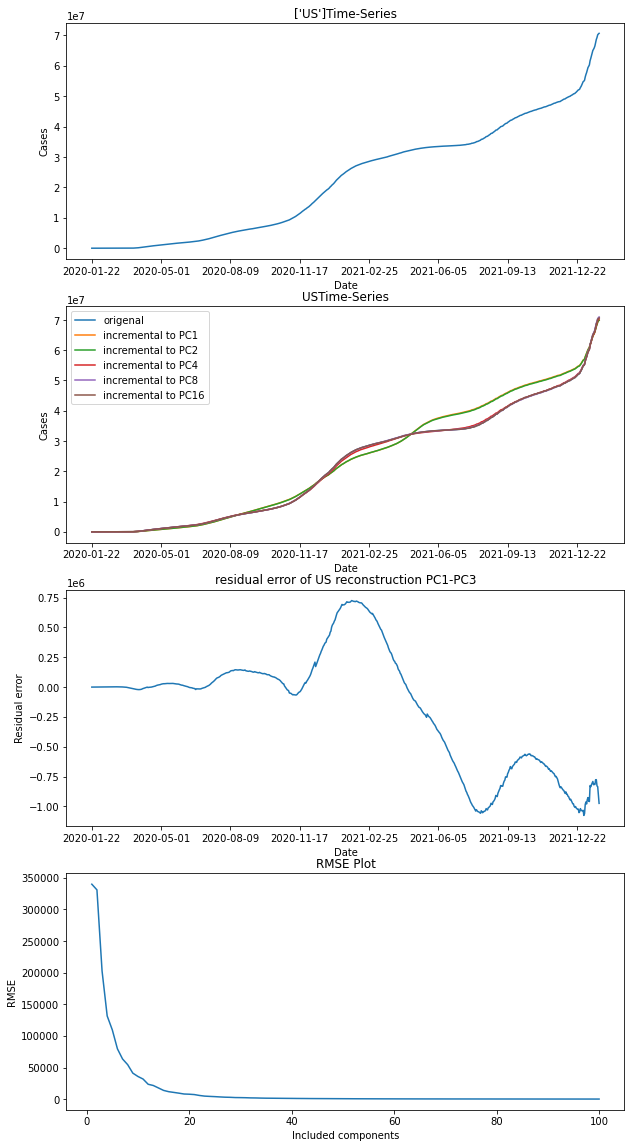

In [434]:
plot_country_figures(cases_raw, ['US'])

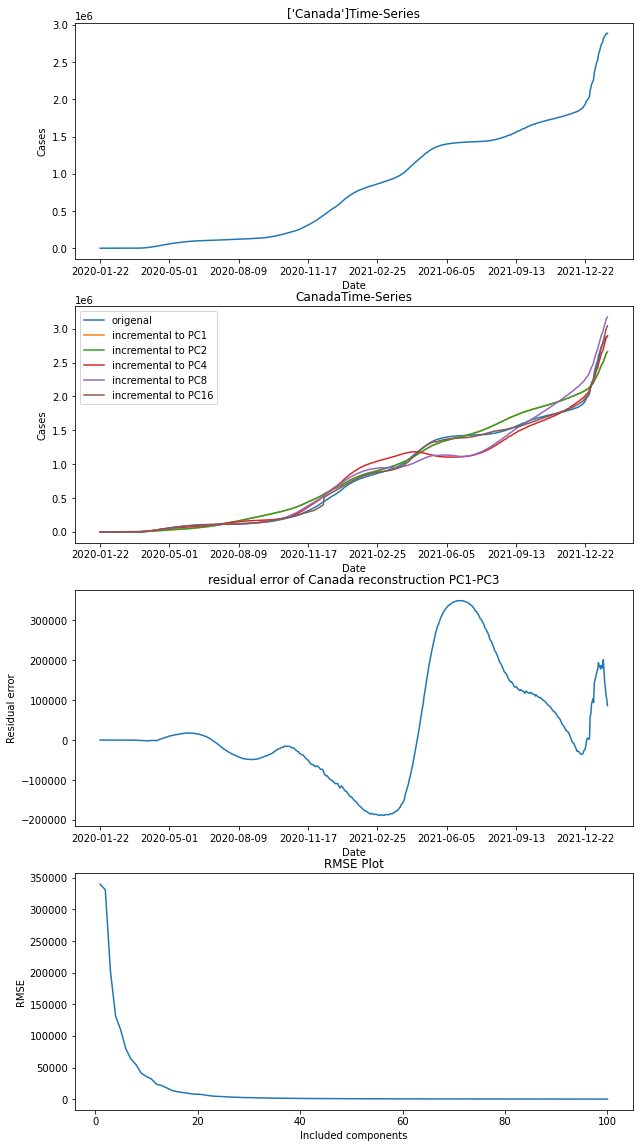

In [435]:
plot_country_figures(cases_raw, ['Canada'])

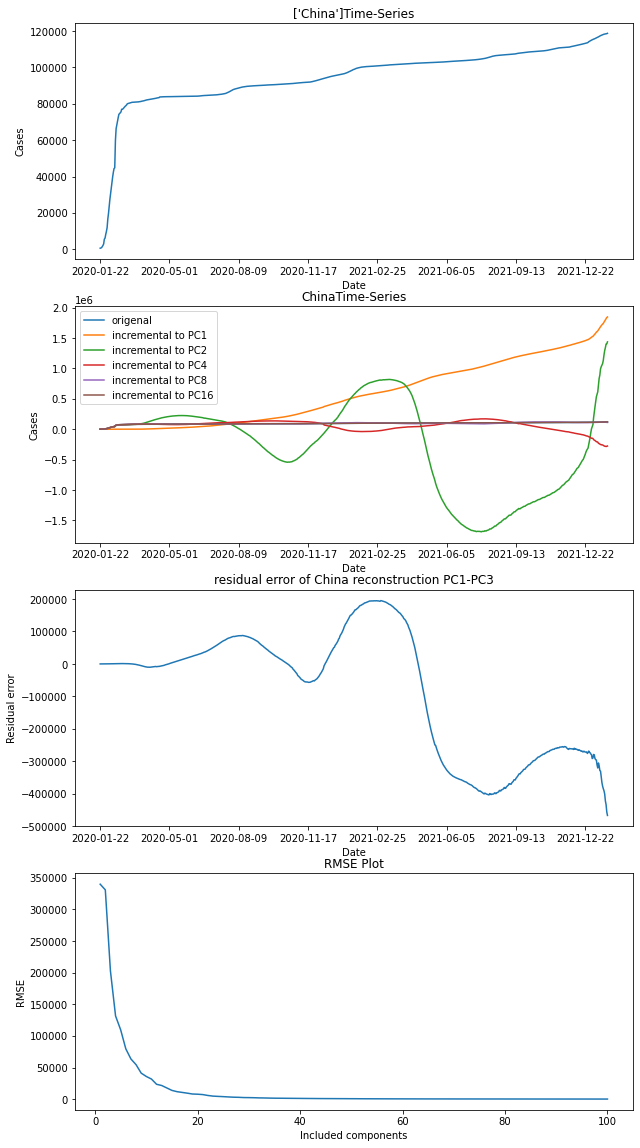

In [436]:
plot_country_figures(cases_raw, ['China'])

# Part 4: Fashion-MNIST dataset [4 Marks]
Fashion-MNIST is a dataset for clothes. 
Each image in Fashion-MNIST has 28x28 pixels which can be represented in an array with 784 elements. You can take a better look at this dataset in this [link](https://www.openml.org/d/40996) 

In this part, we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Create a new dataset by selecting images from *only* three categories (three distinct labels). 
    * To compress and reconstruct images better with PCA, it is better to choose items that are similar in shape. why? **[0.5]**
* Compute Eigenvectors and Eigenvalues. **[0.5]**
* Plot the first 10 eigenvectors (as images similar to eigenfaces). What trends do you observe? **[0.5]**
* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as a reconstruction with the first $n$ th principal components. **[1]**
* Run your function a few times, and determine how many components are required so that we (humans!) can identify the items. **[0.5]**
* Assume you want to share this dataset with someone else. Instead of directly giving them the whole dataset, you can share the eigenvectors (some of them) and projections with them, and thay can do a dot product to get the reconstructions.  Based on the number of components that you found in the last step, what would be the compression ratio for a dataset with 1000 images? **[1]**
  * Hint: compare the dataset size with a case where we only use some principal components and projections.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("Fashion-MNIST")
x = mnist.data[0:1000]
y = mnist.target[0:1000]
target_encoding = {0: "T-shirt/top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}

In [2]:
x.shape

(1000, 784)

Label is: Ankle boot


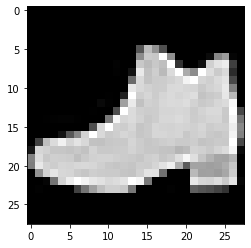

In [3]:
import matplotlib.pyplot as plt 
plt.gray() 
ind = 15
plt.imshow(x.loc[ind].values.reshape(28,28)) 
print ("Label is:", target_encoding[int(y[ind])])
plt.show() 

In [4]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,119.0,114.0,130.0,76.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,96.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,178.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0,...,26.0,13.0,2.0,24.0,31.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
## put target into dataframe
x['type']=y

/var/folders/7z/6tf98rc93hs5zf3rfz6g5_zm0000gn/T/ipykernel_53688/3768310011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['type']=y


It is better to choose items that are similar in shape. why? 

Because may want our model to capture enough details to identify different class of objects. If we choose objects that have very different shape, it can be easy to identify them even if we don't get enough details. For example, dress and sneaker, sneakers are wide and short, while dresses are long and narrow, it is much more easier to identify sneakers from dresses than identify sneakers from sandals.

In addition, if we choose items from significant different shape, the form of eigenvectors would be messy, they would capture messy signals, then we would need much more PCs to capture enough details.

In [8]:
## select target 5,7,9 which are all shoes
x_shoe = pd.concat([x[x['type'] == '5'], x[x['type'] == '7'],x[x['type'] == '9']])
x_shoe = x_shoe.sort_index()
x_shoe

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,64.0,42.0,24.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


In [9]:
## save target into y_shoe, and get matrix of x
y_shoe = x_shoe.type
x_shoe = x_shoe.drop(columns=['type'])
x_shoe

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,64.0,42.0,24.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Compute Eigenvectors and Eigenvalues
XMat = x_shoe.values
n, d = XMat.shape
C = np.dot(XMat.T, XMat) / (n-1)
eigenValues, eigenVectors = np.linalg.eigh(C)

# sort eigenVectors in descending order by their eigenValue
idx = np.argsort(-eigenValues)
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:, idx]
print(eigenValues)
print(eigenVectors)

[ 4.69982704e+06  7.37608096e+05  2.37308111e+05  1.05803719e+05
  8.01920349e+04  6.74886694e+04  6.52562741e+04  5.32128213e+04
  4.89306203e+04  4.54413662e+04  3.79833489e+04  3.54139232e+04
  3.28417232e+04  3.14861895e+04  2.66467190e+04  2.48859173e+04
  2.42507219e+04  2.33294217e+04  2.28373767e+04  1.89306714e+04
  1.81421677e+04  1.70036690e+04  1.63016156e+04  1.58879372e+04
  1.56873085e+04  1.53125753e+04  1.42656426e+04  1.36047379e+04
  1.32662539e+04  1.27867384e+04  1.26819513e+04  1.21458300e+04
  1.15700931e+04  1.12697285e+04  1.06875430e+04  1.02294907e+04
  9.81518409e+03  9.64039585e+03  9.37463068e+03  9.29427204e+03
  9.08580953e+03  8.72612615e+03  8.60250935e+03  8.37488578e+03
  8.09942873e+03  8.06956337e+03  7.78914751e+03  7.42769959e+03
  7.26059826e+03  7.08267534e+03  6.74098132e+03  6.66572837e+03
  6.33556557e+03  6.17764479e+03  6.06197723e+03  5.90675809e+03
  5.77518660e+03  5.74213133e+03  5.58343354e+03  5.48187826e+03
  5.27049070e+03  5.17881

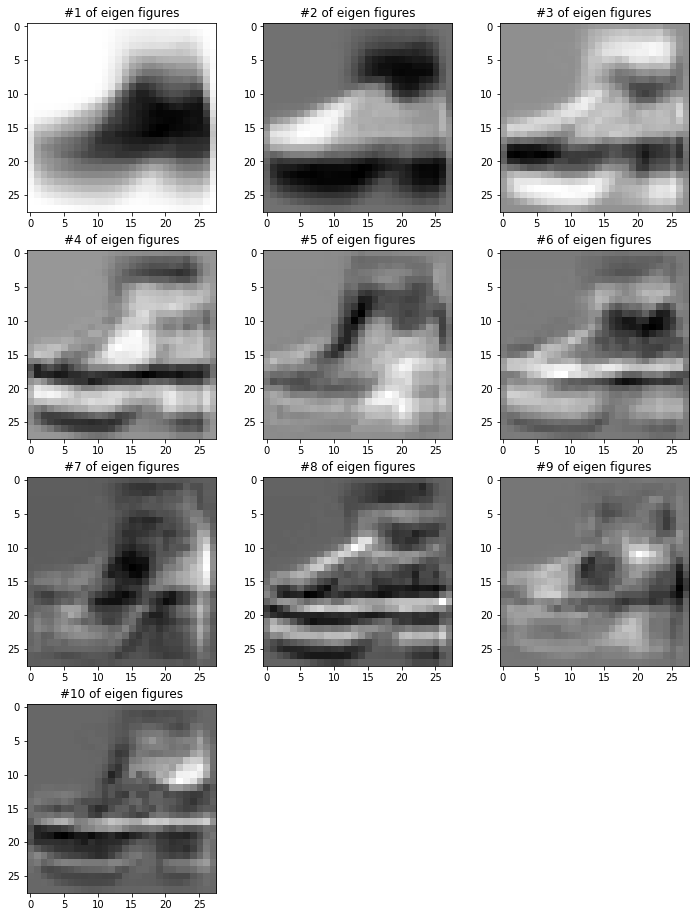

In [14]:
# Plot the first 10 eigenvectors. 
fig = plt.figure(figsize=(12, 16))
for i in range(0, 10):
    plt.subplot(4, 3, i+1)
    plt.gray() 
    plt.imshow(eigenVectors[:, i].reshape(28,28),cmap = plt.cm.gray)
    plt.title('#{} of eigen figures'.format(i+1))

What trends do you observe?

We can see that the figure for the first two eigenvectors shows opposite colors, the first one has white background and black shoe, the second has black background and white shoe, so we can assume that the first eigenvectors capture opposite signals from the dataset.

The following figures are more complicated (the eigen shoes has more patterns), and the figure seems to be more and more blurry.

In [15]:
## Create a function that requires an argument n and plots a random image from the dataset, 
## as well as a reconstruction with the first nth principal components.
def recon(n):
    ## randomly choose image ##
    IMAGE_IDX = np.random.randint(0,XMat.shape[0])
    print ("Label of random selectied image:", target_encoding[int(y_shoe.values[IMAGE_IDX])])
    
    ## full image ##
    fig = plt.figure(figsize=(12,12))
    plt.subplot(1, 2, 1)
    plt.gray() 
    plt.imshow(XMat[IMAGE_IDX].reshape(28,28)) 
    plt.title('Original image')

    ## reconstruction ##
    P = np.dot(XMat[IMAGE_IDX].reshape(1, -1) , eigenVectors[:, 0:n])
    R = np.dot (P, eigenVectors[:, 0:n].T)
    reconImage = R.reshape(28,28)
    plt.subplot(1, 2, 2)
    plt.title('Reconstrusction with first '+str(n)+' principle components')
    plt.imshow(reconImage, cmap = plt.cm.gray)
    

Label of random selectied image: Sandal
Label of random selectied image: Ankle boot
Label of random selectied image: Sneaker
Label of random selectied image: Sneaker
Label of random selectied image: Sneaker
Label of random selectied image: Sandal
Label of random selectied image: Sneaker
Label of random selectied image: Sandal
Label of random selectied image: Sneaker
Label of random selectied image: Ankle boot
Label of random selectied image: Ankle boot
Label of random selectied image: Sneaker


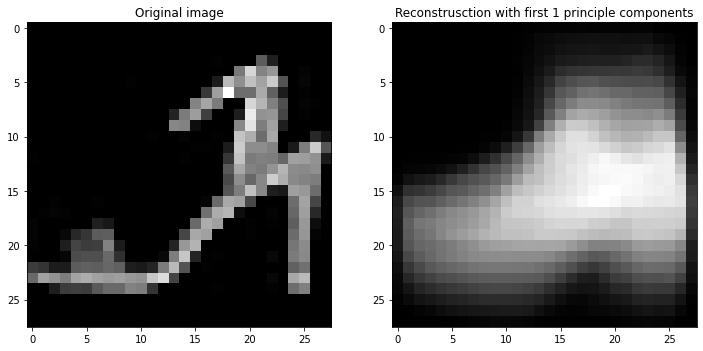

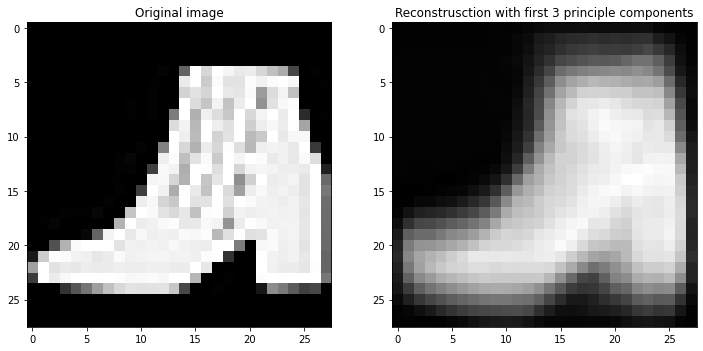

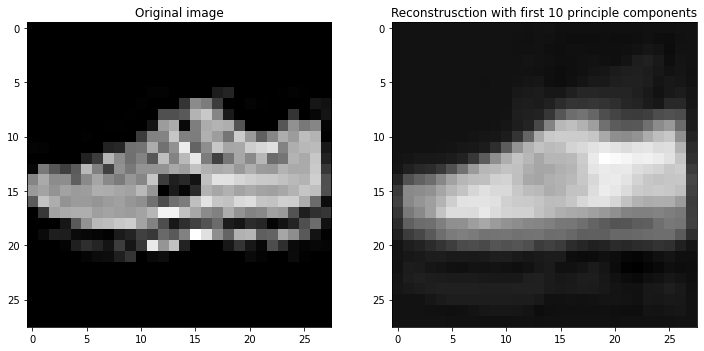

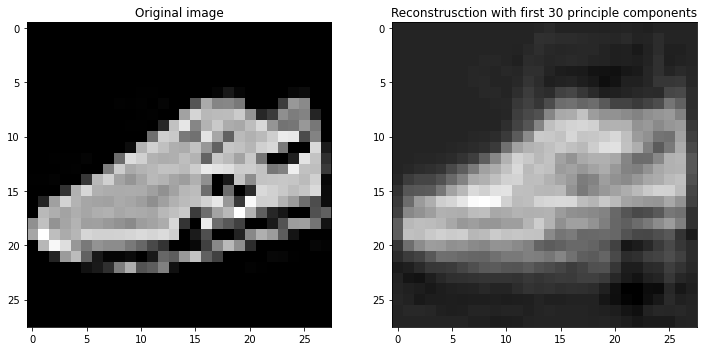

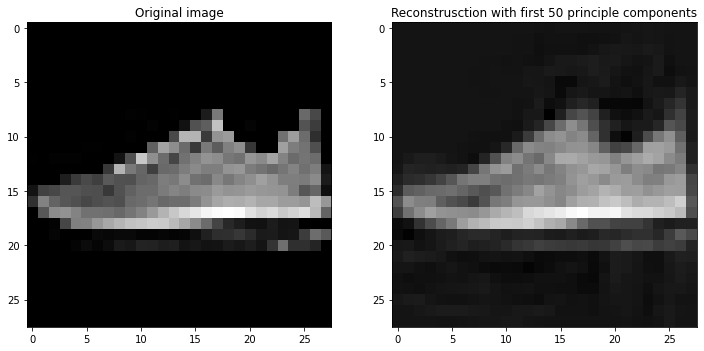

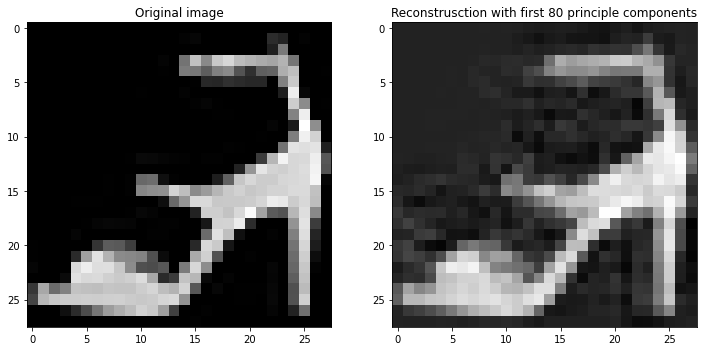

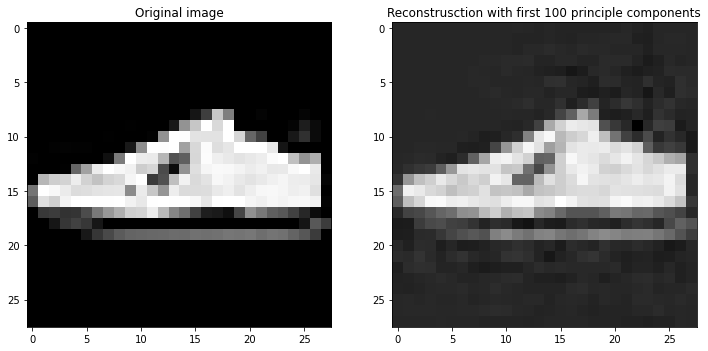

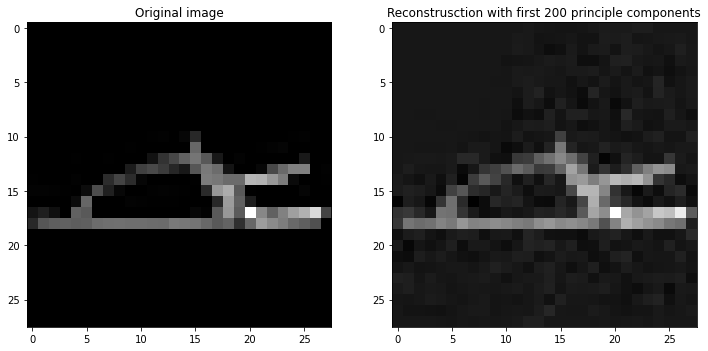

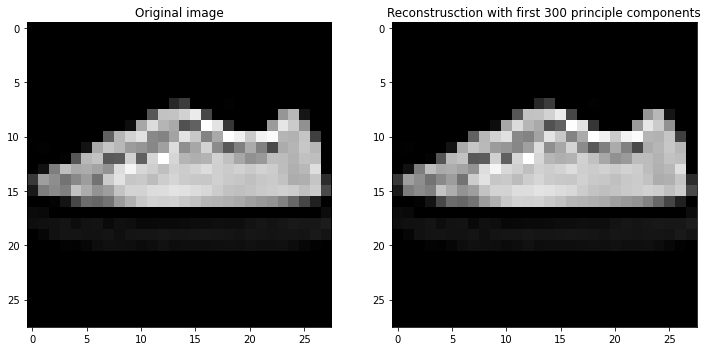

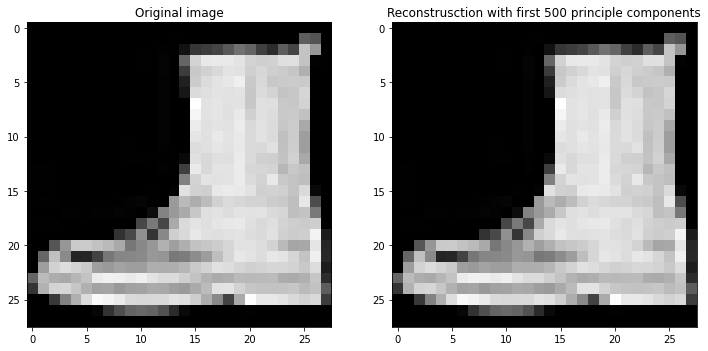

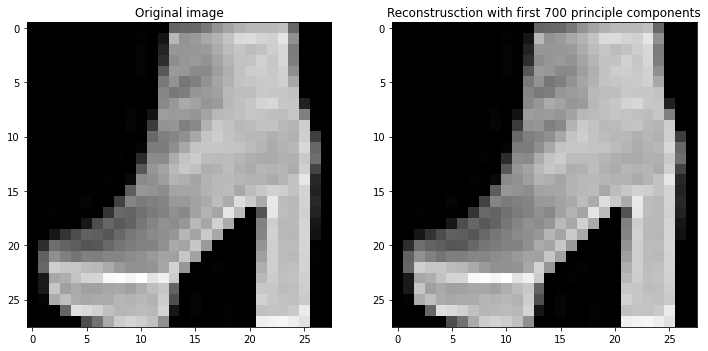

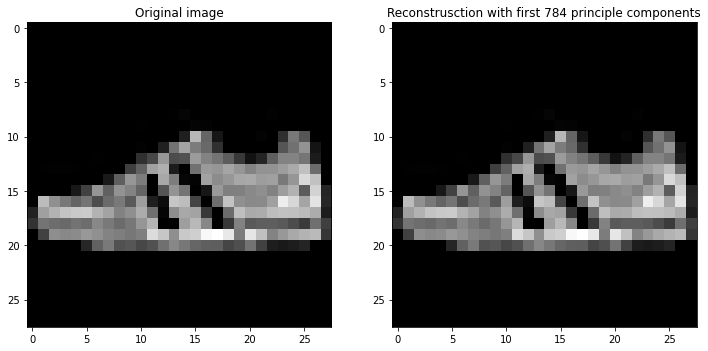

In [18]:
# Run your function a few times, 

numEvsSet = [1, 3, 10, 30, 50, 80, 100, 200, 300, 500, 700, 784]
for numEvs in numEvsSet:
    recon(numEvs)

Determine how many components are required so that we (humans!) can identify the items.

I would say around 80 pcs is required. For 50, the figure is too foggy, 100 pc nearly restore the picture, so 80 is needed to initially identify the image.

Assume you want to share this dataset with someone else. Instead of directly giving them the whole dataset, you can share the eigenvectors (some of them) and projections with them, and thay can do a dot product to get the reconstructions. Based on the number of components that you found in the last step, what would be the compression ratio for a dataset with 1000 images?
Hint: compare the dataset size with a case where we only use some principal components and projections.


Summarizing PCA:
The dataset we have here is X, with shape (1000, 784). Total elements in the dataset: 784,000

Apply PCA, we get W: (784, 784).
Since we determine around 80 PCs are enough to identify items, W_op: (784, 80).
Then the size of projection: X @ W_op = Proj (1000, 80).
Now data is summarized in Proj:(1000, 80) and W_op: (784, 80).

Totally elements needed for reconstruction here is: 1000 x 80 + 784 x 80 = 142,720.

Compression Ratio: 784,000 / (142,720 + StandardScaler parameters) ~ 5.4x


# References

Understanding PCA and SVD:

1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8

2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca

3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues

4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:

1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/

2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:

1. https://www.worldometers.info/coronavirus/

2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined

